In [ ]:
! pip install kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/drive/MyDrive/Colab_Notebooks/IST_691/Deep_Learning_Final/kaggle.json ~/.kaggle/kaggle.json


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download sshikamaru/car-object-detection


car-object-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir "/content/drive/MyDrive/Colab_Notebooks/IST_691/Deep_Learning_Final/car-object-detection"
#!unzip "/content/car-object-detection.zip" -d "/content/drive/MyDrive/Colab_Notebooks/IST_691/Deep_Learning_Final/car-object-detection"

mkdir: cannot create directory ‘/content/drive/MyDrive/Colab_Notebooks/IST_691/Deep_Learning_Final/car-object-detection’: File exists
Archive:  /content/car-object-detection.zip
replace /content/drive/MyDrive/Colab_Notebooks/IST_691/Deep_Learning_Final/car-object-detection/data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
# install dependencies
import os
import pandas as pd
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import yaml
import torch
from tqdm.auto import tqdm
import shutil

In [3]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [ ]:
#loading pre-trained model
detect_model = YOLO('yolov8n.pt')

#Instance
inst_model = YOLO('yolov8n-seg.pt')  # Transfer the weights from a pretrained model (recommended for training)

100%|██████████| 6.23M/6.23M [00:00<00:00, 79.3MB/s]


100%|██████████| 6.73M/6.73M [00:00<00:00, 72.1MB/s]


In [ ]:
img = '/content/drive/MyDrive/Colab_Notebooks/IST_691/Deep_Learning_Final/kitchen.jpg'
detection_results = detect_model.predict(img)
instance_results = inst_model.predict(img)


image 1/1 /content/drive/MyDrive/Colab_Notebooks/IST_691/Deep_Learning_Final/kitchen.jpg: 448x640 1 bowl, 6 chairs, 6 potted plants, 2 dining tables, 1 microwave, 1 oven, 1 refrigerator, 60.6ms
Speed: 13.1ms preprocess, 60.6ms inference, 34.7ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/drive/MyDrive/Colab_Notebooks/IST_691/Deep_Learning_Final/kitchen.jpg: 448x640 1 bowl, 5 chairs, 6 potted plants, 2 dining tables, 1 microwave, 3 ovens, 1 refrigerator, 24.2ms
Speed: 2.5ms preprocess, 24.2ms inference, 5.3ms postprocess per image at shape (1, 3, 448, 640)


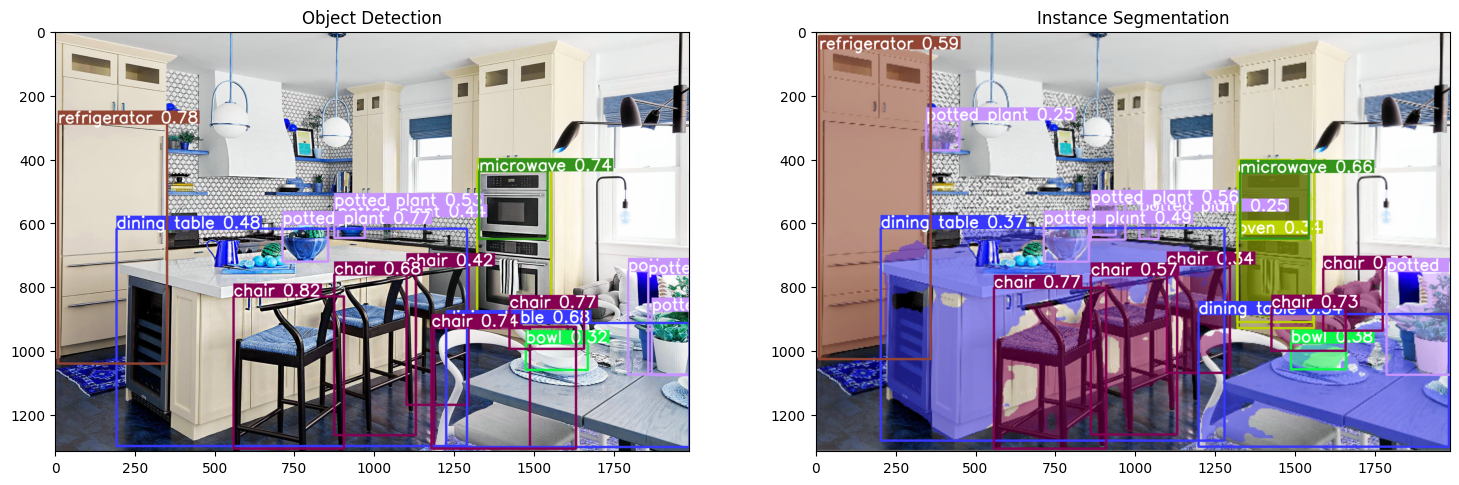

In [ ]:
detection_array = detection_results[0].plot()
instance_array = instance_results[0].plot()
fig = plt.figure(figsize=(18, 9))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Object Detection")
ax1.imshow(detection_array)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Instance Segmentation")
ax2.imshow(instance_array)


In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jMEtRTt6FxFjC54OfGOD")
project = rf.workspace("deep-learning-tkovz").project("taylororkanye-lvz0a")
dataset = project.version(4).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      S

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.225, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to DashCam-4 in yolov8:: 100%|██████████| 760/760 [00:00<00:00, 8113.15it/s]


In [12]:
%cd {HOME}


import ultralytics
from ultralytics import YOLO
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=40 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/DashCam-4/data.yaml, epochs=40, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

In [ ]:
import ultralytics
from ultralytics import YOLO
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=40 imgsz=800 plots=True

In [11]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

NameError: ignored

In [8]:
%cd {HOME}

/content
